
## Exercice 2: Monte Carlo Integration

### Pol Adillon Albero
04/01/2021

**Objetive:** Evaluate the area enclosed between curves.

### 2.1 Calculation of an area:

Evaluate the area enclosed between the curves $y =\pm \frac{1}{x}$ within the values $x \in [-1,+1]$ and $y \in [-11,+11]$.

Note that the exact value is $A_{exact} = 13.5916$.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

#Define the limits of integration:
x_max = 1
x_min = -1
y_max = 11
y_min = -11

A_limit = (x_max-x_min)*(y_max-y_min)

N_throws = 10000
N_hit = 0   #It'll count the number of throws enclosed between the curves

# Start throwing points and counting the 'hits'
# random.uniform() returns a random floating number 
# between the two specified numbers (both included).

for _ in range(N_throws):
    x_random = random.uniform(x_min,x_max)
    y_random = random.uniform(y_min,y_max)
    
    #Check if we hit the target area
    if abs(y_random) <= abs(1/x_random):
        N_hit = N_hit + 1
        
print("Afer",N_throws,"throws the number of hits is", N_hit,".")
print("N_hit/N_throws =",N_hit/N_throws)
print("The area of the square defined by the X, Y intervals is (x_max-x_min)*(y_max-y_min).")
print("Hence the area between the curves is:", A_limit *N_hit/N_throws)
 


        


Afer 10000 throws the number of hits is 3139 .
N_hit/N_throws = 0.3139
The area of the square defined by the X, Y intervals is (x_max-x_min)*(y_max-y_min).
Hence the area between the curves is: 13.8116


Let's now visualize the random throws in the next plot

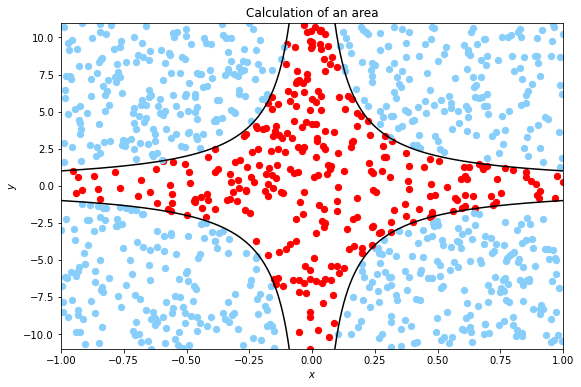

In [2]:
# These 'if' are just for the plot. We need to distinguish 
# between possitive and negative x, to avoid the vertical 
# asymtote at x = 0 (we are using plt.plot())

if x_max < 0:
    t1 = np.arange(x_min,x_max, 0.001)
    t2 = t1
    
if (x_min < 0)and(x_max > 0):
    t1 = np.arange(x_min,-0.0001, 0.001)
    t2 = np.arange(0.0001,x_max, 0.001)
    
if (x_min > 0):
    t1 = np.arange(x_min,x_max, 0.001)
    t2 = t1
    
    
#Plot's script 
fig, ax=plt.subplots(figsize = (9,6))

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Calculation of an area")

# Plot curves: y = ± 1/x
ax.plot(t1,1/t1,"black",t2,1/t2,"black",t1,-1/t1,"black",t2,-1/t2,"black")

# initialize values 
N_throws = 1000
N_hit = 0

# Throw random dots 
for _ in range(N_throws):
    x_random = random.uniform(x_min,x_max)
    y_random = random.uniform(y_min,y_max)
    
    # Check if we hit the target area
    if abs(y_random) <= abs(1/x_random):
        N_hit = N_hit + 1
        plt.scatter(x_random,y_random,s= 40,c="r")
        
    # The dot isn't inside the curves 
    else:
        plt.scatter(x_random,y_random,s= 40,c="lightskyblue")       


plt.show()

#### 2.1.1 Several MC series:

Run several MC series with $N_{throws}$ = {100 ~ 10 000 000}.
For each $N_{throws}$ calculate:

1. the mean value of the area:

$$<A(N_{throws})> = \frac{1}{M} \sum_{i=1}^{M} A_i(N_{throws}) $$

2. its standard deviation $\sigma$ (variance is defined as $\sigma ^2$):

$$ \sigma (N_{throws}) = \sqrt{<(A(N_{throws})-A_{exact})^2>} $$

In [3]:
M = 100 # Number of cycles with N_throws
         # This will be used to make an average of N_throws
    
A_exact = 13.5916 # Obtained with other methods

N_vec = [100,300,600,1000,3000,6000,10000,30000,100000,1000000]             # N_throws = {100 ~ 1 000 000}
#N_vec = [100,300,600,1000,3000,6000,10000,30000,100000,1000000,10000000]    # N_throws = {100 ~ 10 000 000}
sigma_vec = [0]*len(N_vec)                                                  # σ(N)
Error_vec = [0]*len(N_vec)                                                  # A_exact-A_analitic

#This loop runs different N_throws
for x in range(len(N_vec)):
       
    print(x)
    N_throws = N_vec[x]
    print("N_throws:",N_throws)
    
    # We will add different results for the same N_throws (Used in the average <···>)
    A_counter = 0
    Sigma2_counter = 0 
    
    #This loop runs M Monte Carlo series
    for i in range(M):
        
        N_hit = 0   # Initialize N_hit (number of throws enclosed between the curves)
        
        # Start throwing points and counting the 'hits'
        for _ in range(N_throws):
            x_random = random.uniform(x_min,x_max)
            y_random = random.uniform(y_min,y_max)
    
            #Check if we hit the target area
            if abs(y_random) <= abs(1/x_random):
                N_hit = N_hit + 1
            
        Sigma2_counter = (A_limit*N_hit/N_throws-A_exact)**2
        A_counter = A_counter + A_limit*N_hit/N_throws

    A_Analytic = A_counter/M
    Sigma = (Sigma2_counter/M)**1/2
    
    #Fill in the vectors:
    sigma_vec[x] = Sigma
    Error_vec[x] = abs(A_Analytic-A_exact)
    
    
    print("Analytic value: <A(N)> =", A_Analytic)
    print("Error: |<A(N)> -A_exact| =", abs(A_Analytic-A_exact))
    print("σ(N) =", Sigma)
    print(" ")
    
print("N_vec", N_vec)
print("sigma_vec",sigma_vec)


0
N_throws: 100
Analytic value: <A(N)> = 13.8248
Error: |<A(N)> -A_exact| = 0.23320000000000007
σ(N) = 0.0007667528000000015
 
1
N_throws: 300
Analytic value: <A(N)> = 13.770533333333331
Error: |<A(N)> -A_exact| = 0.1789333333333314
σ(N) = 0.0005839083555555574
 
2
N_throws: 600
Analytic value: <A(N)> = 13.571066666666672
Error: |<A(N)> -A_exact| = 0.02053333333332752
σ(N) = 0.0011926728000000019
 
3
N_throws: 1000
Analytic value: <A(N)> = 13.658480000000008
Error: |<A(N)> -A_exact| = 0.06688000000000827
σ(N) = 0.0009874567999999997
 
4
N_throws: 3000
Analytic value: <A(N)> = 13.59922666666667
Error: |<A(N)> -A_exact| = 0.007626666666670445
σ(N) = 0.0001231403555555549
 
5
N_throws: 6000
Analytic value: <A(N)> = 13.589620000000009
Error: |<A(N)> -A_exact| = 0.001979999999990767
σ(N) = 0.00011410568888888926
 
6
N_throws: 10000
Analytic value: <A(N)> = 13.604579999999999
Error: |<A(N)> -A_exact| = 0.012979999999998881
σ(N) = 0.00019602000000000077
 
7
N_throws: 30000
Analytic value: <A(

3. Plot $\sigma (N_{throws})$ versus $N_{throws}^{-1/2}$

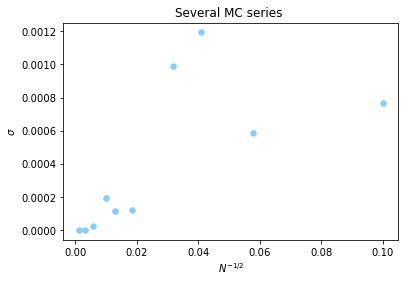

In [4]:
#Plot's script    
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])
plt.xlabel("$N^{-1/2}$")
plt.ylabel("$\sigma$")
plt.title("Several MC series ")

plt.scatter(np.power(N_vec, -1/2),sigma_vec,s= 30,c="lightskyblue")    # Sigma N^{-1/2}   


plt.show()

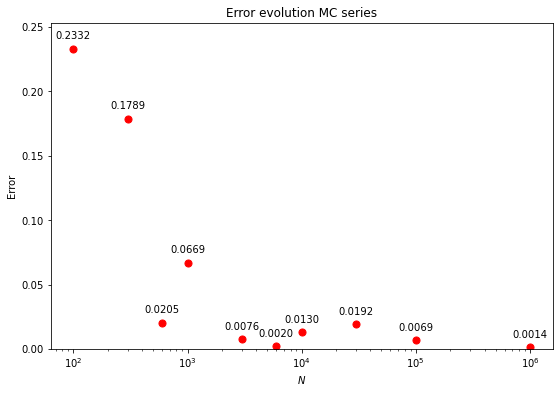

In [5]:
#Plot's script 
fig, ax=plt.subplots(figsize = (9,6))

plt.xlabel("$N$")
plt.ylabel("Error")
plt.title("Error evolution MC series")
plt.ylim(0, Error_vec[0]+0.02)

ax.set_xscale("log")

ax.scatter(N_vec,Error_vec,s= 50,c="r")    # Error vs N  

for x,y in zip(N_vec,Error_vec):

    label = "{:.04f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()


We can see that the error decrease when $N$ increases.

### 2.2 Integration of an analytical function:

Numerica calculation of:

$$ I = \int_0^\infty \int_0^\infty \int_0^\infty \sin^2 (x_1 +x_2 + x_3) \ x_1\ x_2\ x_3\ e^{-x_1^2 - x_2^2 - x_3^2}\ dx_1\ dx_2\ d x_3$$

The exact value is $I = 0.0564563$.

The aim is to get 3 correct digits after the decimal point. The fourth digit may fluctuate.

#### 2.2.1 MC calculation without Importance Sampling

Generate a large sample of points in ($x_1,x_2,x_3$) in the domain $x_i \in [0,a]$ with $i =$ 1, 2, 3 and $a \rightarrow \infty$, distributed uniformily.

Evaluate the integral 

$$ I = \int_0^\infty \int_0^\infty \int_0^\infty \sin^2 (x_1 +x_2 + x_3) \ x_1\ x_2\ x_3\ e^{-x_1^2 - x_2^2 - x_3^2}\ dx_1\ dx_2\ d x_3 \\ = a^3 <\sin^2 (x_1 +x_2 + x_3) \ x_1\ x_2\ x_3\ e^{-x_1^2 - x_2^2 - x_3^2}>
$$

In practice, we can limit ourselves to using $a = 7.5$

In [62]:
Dim = 3                          # Number of variables
a = 7.5                          # Upper limit of integration
Integral_theo = 0.0564563        # Obtained with other methods

#Function we want to integrate
def funcio(x1,x2,x3):
    f = (np.sin(x1+x2+x3)**2)*(x1*x2*x3)*np.exp(-x1**2-x2**2-x3**2)
    return f

#Inicialize value for the while
M = 10                           # Number of MC cycles
Error = 0.1                      # Error = abs(Integral_theo-Integral_MC)
Precission = Integral_theo/100   # Admissible error 

print("M - Integral_MC - Error")

while Error>Precission:
    k = 0  # Used to calculate the mean value of funcion
    
    for i in range(M):
        x1 = random.uniform(0,a)
        x2 = random.uniform(0,a)
        x3 = random.uniform(0,a)
        
        k = k + funcio(x1,x2,x3)
    
    Integral_MC = a**3*k/M
    
    Error = abs(Integral_MC-Integral_theo)

    
    print(M,Integral_MC,Error)
    
    M = M*10 # We'll do the next MC with more steps

print()    
print("Without imporant sampling, using", int(M/10),     #int(M/10) is because we multiply M times 10 in the last loop-While
      "MC steps we obtain: I =",Integral_MC)
    
    
    
    

M - Integral_MC - Error
10 0.000100161090175475 0.05635613890982453
100 0.024444220517089773 0.032012079482910225
1000 0.09762156291955211 0.04116526291955211
10000 0.056556105338458826 9.980533845882489e-05

Without imporant sampling, using 10000 MC steps we obtain: I = 0.056556105338458826


#### 2.2.2 MC calculation with Importance Sampling

Generate a large sample of points in ($x_1,x_2,x_3$) in the domain $x_i \in [0,a]$ with $i =$ 1, 2, 3 and $a \rightarrow \infty$, according to the distribution:

$$  p(x_1,x_2, x_3) = 8\ x_1\ x_2\ x_3\ e^{-x_1^2 - x_2^2 - x_3^2}$$

Note that:

$$ \int_0^\infty \int_0^\infty \int_0^\infty p(x_1,x_2, x_3)\ dx_1\ dx_2\ d x_3 = 1 $$

And: 
$$  p(x_1,x_2, x_3) = p(x_1)p(x_2)p(x_3)$$ 

where $p(x_i) = 2x_i e^{-x_i^2}$



In [45]:
def Random_Value_PDF(u):
    """
    This function recives a uniform random value 
    u ∈ [0,1] and returns a random value generated 
    according to the distribution p(x) = 2x exp{-x²}
    """
    x = np.sqrt(-np.log(u))
    return x


#Function we want to integrate
def funcio(x1,x2,x3):
    f = 1/8*(np.sin(x1+x2+x3)**2)
    return f


Dim = 3                          # Number of variables
a = 7.5                          # Upper limit of integration
Integral_theo = 0.0564563        # Obtained with other methods

#Inicialize value for the while
M = 10                           # Number of MC cycles
Error = 0.1                      # Error = abs(Integral_theo-Integral_MC)
Precission = Integral_theo/100   # Admissible error 

print("M - Integral_MC - Error")

while Error>Precission:
    k = 0  # Used to calculate the mean value of funcion
    
    for i in range(M):
        u1 = random.uniform(0,1)     #Generate random values: uniform [0,1]
        u2 = random.uniform(0,1)
        u3 = random.uniform(0,1)
    
        x1 = Random_Value_PDF(u1)    #Generate random values: PDF
        x2 = Random_Value_PDF(u2)
        x3 = Random_Value_PDF(u3)
    
        k = k + funcio(x1,x2,x3)
    
    Integral_MC = k/M
    
    Error = abs(Integral_MC-Integral_theo)
    
    print(M,Integral_MC,Error)
    
    M = M*10   # We'll do the next MC with more steps

    
print()    
print("With imporant sampling, using", int(M/10),
      "MC steps we obtain: I =",Integral_MC)
    
   
    
    
    


    

M - Integral_MC - Error
10 0.04694151136404458 0.009514788635955423
100 0.05664156219798437 0.0001852621979843705

With imporant sampling, using 100 MC steps we obtain: I = 0.05664156219798437


#### 2.2.3 MC integral extended to 11-dimensional case: without Importance Sampling

Repeate the same as in the section 2.2.2, but this time with 11 variables.

In [65]:
def Random_Value_PDF(u):
    """
    This function recives a uniform random value 
    u ∈ [0,1] and returns a random value generated 
    according to the distribution p(x) = 2x exp{-x²}
    """
    x = np.sqrt(-np.log(u))
    return x


#Function we want to integrate
def funcio(vector):
    f = 1/(2**Dim)*(np.sin(np.sum(vector))**2)
    return f


Dim = 11                         # Number of variables
M = 10                           # Number of MC cycles
Integral_theo = 0.0002418585339  # Obtained with other methods
x_vec = [0]*Dim                  # Vector for random x1,x2,···,x11

k = 0                   # Used to calculate the mean value of funcion
for i in range(M):
    
    #Generate for all the 11 variable a Random-PDF value
    
    for j in range(Dim):
        u = random.uniform(0,1)        #Generate random values: uniform [0,1]
        x_vec[j] = Random_Value_PDF(u)    #Generate random values: PDF
    
    k = k + funcio(x_vec)
    
Integral_MC = k/M
Error = abs(Integral_MC-Integral_theo)
    
print("Using",M,"MC steps we obtain:")

print("     I =",Integral_MC)
print("     Error =", Error)

Using 10 MC steps we obtain:
     I = 0.00027995982592824597
     Error = 3.810129202824598e-05
